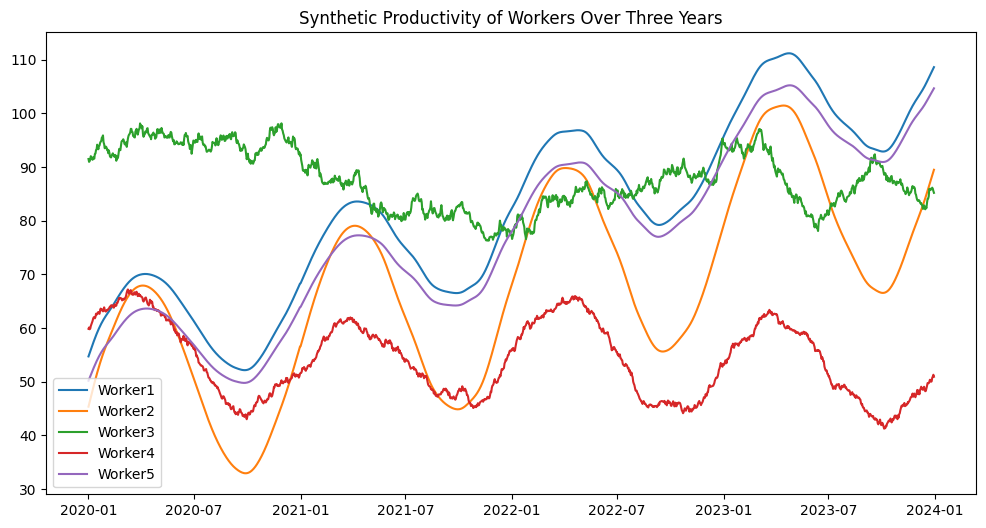

In [1]:
from my_packages import *
from noise import pnoise1  # Install via `pip install noise`

# Parameters
num_days = 365 * 4  # 3 years of data
dates = pd.date_range(start="2020-01-01", periods=num_days)
workers = ['Worker1', 'Worker2', 'Worker3', 'Worker4', 'Worker5']

# Initialize dataset
data = pd.DataFrame(index=dates, columns=workers)

# Define Perlin noise function
def generate_perlin_noise(size, scale=0.1, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.array([pnoise1(i * scale) for i in range(size)])

# Generate productivity time series for each worker
np.random.seed(100)  # For reproducibility

for worker in workers:
    base_trend = np.linspace(50, 100, num_days)  # Linear trend
    seasonal_pattern = 10 * np.sin(2 * np.pi * dates.dayofyear / 365)  # Annual seasonality
    random_walk = np.cumsum(np.random.normal(0, 1, num_days))  # Random walk
    perlin_noise = generate_perlin_noise(num_days, scale=0.02)
    
    # Combine components with slight variations for each worker
    if worker == 'Worker1':
        data[worker] = base_trend + seasonal_pattern + perlin_noise
    elif worker == 'Worker2':
        data[worker] = base_trend * 0.9 + 2 * seasonal_pattern + perlin_noise
    elif worker == 'Worker3':
        data[worker] = 80 + 0.5 * random_walk + perlin_noise
    elif worker == 'Worker4':
        data[worker] = 60 + 0.3 * random_walk + seasonal_pattern + perlin_noise
    elif worker == 'Worker5':
        data[worker] = base_trend * 1.1 - 5 + seasonal_pattern + perlin_noise

# Add interdependencies (correlations) among workers
data['Worker1'] += 0.1 * data['Worker2']
data['Worker3'] += 0.2 * data['Worker4']

# Ensure non-negative productivity
data[data < 0] = 0

# Plot synthetic data
plt.figure(figsize=(12, 6))
for worker in workers:
    plt.plot(data.index, data[worker], label=worker)
plt.title("Synthetic Productivity of Workers Over Three Years")
plt.legend()
plt.show()

# Save synthetic data
data.to_csv("synthetic_worker_productivity.csv", index=True)
